<a href="https://colab.research.google.com/github/boubakri-elaa/heart-disease-prediction-ml/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet IA - Prédiction des Maladies Cardiaques**


## **Objectif du projet**
Ce projet vise à construire un modèle de Machine Learning capable de prédire la présence ou l'absence de maladies cardiaques chez des patients en utilisant des données médicales.

### **Contexte**
Les maladies cardiaques sont l'une des principales causes de mortalité dans le monde. Ce projet utilise diverses variables médicales pour créer un modèle prédictif performant.

### **Méthodologie**
1. Analyse exploratoire des données
2. Prétraitement avec Pipeline
3. Entraînement de 5 modèles de classification
4. Validation croisée stratifiée
5. Évaluation et comparaison des performances

# **Importation des Bibilothèques :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modèles de classification
# Existing imports you probably already have
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Optional: XGBoost
try:
    import xgboost as xgb
except ImportError:
    print("XGBoost non installé")


# Métriques d'évaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Configuration des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


# **1. Description du Dataset**
## **Variables du dataset**
Le dataset contient les informations suivantes sur les patients :

**Variables démographiques :**
- `Age` : Âge du patient
- `Gender` : Sexe (Male/Female)

**Variables cliniques :**
- `Blood Pressure` : Pression artérielle
- `Cholesterol Level` : Niveau de cholestérol
- `Diabetes` : Présence de diabète (Yes/No)
- `BMI` : Indice de masse corporelle
- `High Blood Pressure` : Hypertension (Yes/No)
- `Low HDL Cholesterol` : Faible taux de bon cholestérol (Yes/No)
- `High LDL Cholesterol` : Taux élevé de mauvais cholestérol (Yes/No)

**Variables comportementales :**
- `Exercise Habits` : Habitudes d'exercice (Low/Medium/High)
- `Smoking` : Fumeur (Yes/No)
- `Alcohol Consumption` : Consommation d'alcool (Low/Medium/High)
- `Sleep Hours` : Heures de sommeil
- `Sugar Consumption` : Consommation de sucre (Low/Medium/High)

**Autres variables médicales :**
- `Family Heart Disease` : Antécédents familiaux (Yes/No)
- `Stress Level` : Niveau de stress (Low/Medium/High)
- `Triglyceride Level` : Niveau de triglycérides
- `Fasting Blood Sugar` : Glycémie à jeun
- `CRP Level` : Niveau de protéine C-réactive (inflammation)
- `Homocysteine Level` : Niveau d'homocystéine

**Variable cible :**
- `Heart Disease Status` : Présence de maladie cardiaque (Yes/No)

# **Chargement et Exploration du Dataset :**

In [ ]:
# Charger le dataset
df = pd.read_csv('heart_disease.csv')

print("="*80)
print("DESCRIPTION DU DATASET")
print("="*80)

print("\n📏 DIMENSIONS DU DATASET:")
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")

print("\n📋 APERÇU DES PREMIÈRES LIGNES:")
print(df.head())

print("\n🔍 INFORMATIONS SUR LES COLONNES:")
print(df.info())

print("\n📊 STATISTIQUES DESCRIPTIVES:")
print(df.describe())

print("\n🎯 VARIABLE CIBLE: Heart Disease Status")
print(df['Heart Disease Status'].value_counts())
print("\nProportions:")
print(df['Heart Disease Status'].value_counts(normalize=True))

DESCRIPTION DU DATASET

📏 DIMENSIONS DU DATASET:
Nombre de lignes: 10000
Nombre de colonnes: 21

📋 APERÇU DES PREMIÈRES LIGNES:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289      

# **2. Analyse de la Distribution des Classes**

## **Observation importante : Déséquilibre des classes**

Le dataset présente un **déséquilibre des classes** :
- La classe **"No"** (pas de maladie cardiaque) est **majoritaire** (~80%)
- La classe **"Yes"** (présence de maladie cardiaque) est **minoritaire** (~20%)

### **Pourquoi c'est un problème ?**
Sans traitement approprié, les modèles de ML ont tendance à :
- Prédire systématiquement la classe majoritaire
- Ignorer la classe minoritaire (pourtant la plus importante médicalement !)
- Obtenir une accuracy élevée mais des Precision/Recall/F1-Score nuls pour la classe "Yes"

### **Solutions appliquées dans ce projet :**
1. **Stratification** lors du split train/test
2. **class_weight='balanced'** dans les modèles
3. **Stratified K-Fold** pour la validation croisée
4. Utilisation du **F1-Score** comme métrique principale

# **Visualisation de la distribution :**

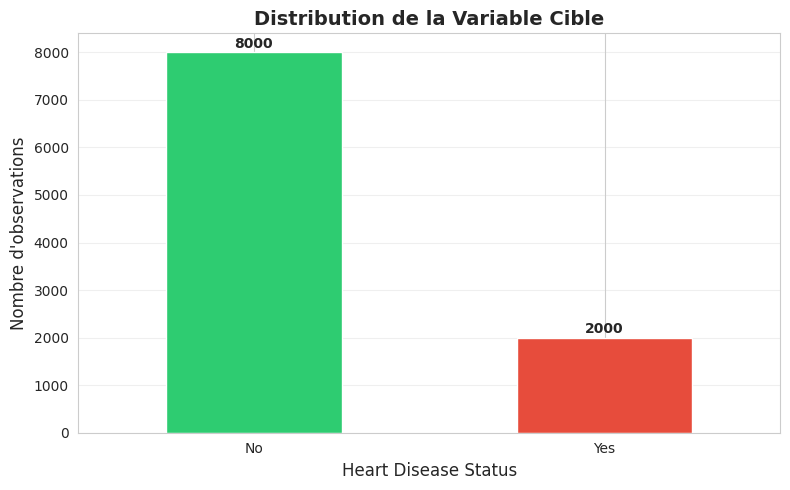


⚠️ OBSERVATION IMPORTANTE:
Le dataset est déséquilibré. Nous utiliserons 'stratify' lors du split
et des poids de classes (class_weight='balanced') dans les modèles.


In [ ]:
plt.figure(figsize=(8, 5))
df['Heart Disease Status'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel("Nombre d'observations", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Heart Disease Status'].value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n⚠️ OBSERVATION IMPORTANTE:")
print("Le dataset est déséquilibré. Nous utiliserons 'stratify' lors du split")
print("et des poids de classes (class_weight='balanced') dans les modèles.")

# **3. Analyse des Valeurs Manquantes**

## **Importance du traitement des valeurs manquantes**

Les valeurs manquantes peuvent :
- Biaiser les résultats des modèles
- Réduire la taille du dataset si on supprime les lignes
- Nécessiter une stratégie d'imputation appropriée

### **Stratégie d'imputation choisie :**

**Pour les variables numériques :**
- Imputation par la **MÉDIANE** (robuste aux valeurs extrêmes/outliers)

**Pour les variables catégorielles :**
- Imputation par le **MODE** (valeur la plus fréquente)

### **Pourquoi utiliser un Pipeline ?**
Le Pipeline garantit que :
- L'imputation est apprise uniquement sur le train
- Pas de "data leakage" (fuite de données)
- Le même preprocessing est appliqué au test

# **Détection des valeurs manquantes :**


ANALYSE DES VALEURS MANQUANTES

📊 COLONNES AVEC VALEURS MANQUANTES:
             Colonne  Valeurs manquantes  Pourcentage (%)
 Alcohol Consumption                2586            25.86
   Cholesterol Level                  30             0.30
            Diabetes                  30             0.30
   Sugar Consumption                  30             0.30
                 Age                  29             0.29
           CRP Level                  26             0.26
  Triglyceride Level                  26             0.26
 High Blood Pressure                  26             0.26
High LDL Cholesterol                  26             0.26
 Low HDL Cholesterol                  25             0.25
         Sleep Hours                  25             0.25
     Exercise Habits                  25             0.25
             Smoking                  25             0.25
        Stress Level                  22             0.22
 Fasting Blood Sugar                  22             0.22
   

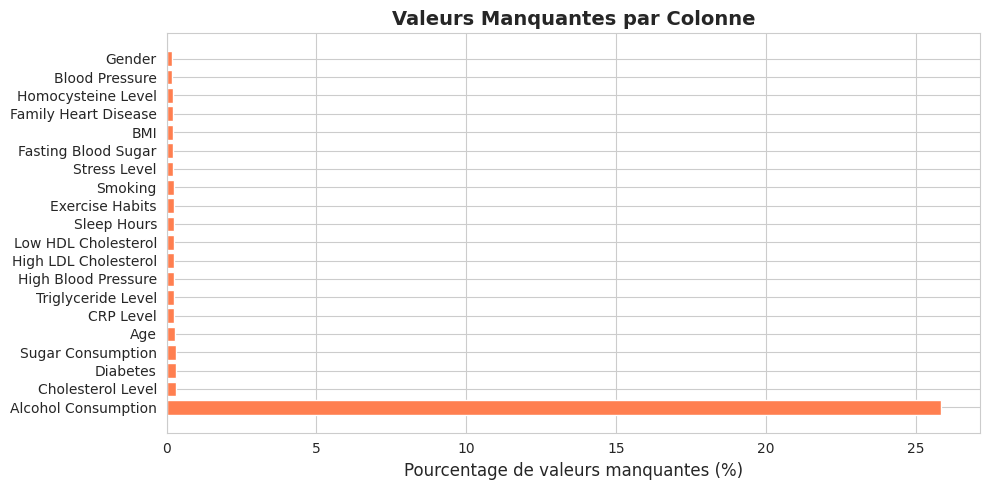

In [ ]:
print("\n" + "="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

if len(missing_df) > 0:
    print("\n📊 COLONNES AVEC VALEURS MANQUANTES:")
    print(missing_df.to_string(index=False))

    # Visualisation
    plt.figure(figsize=(10, 5))
    plt.barh(missing_df['Colonne'], missing_df['Pourcentage (%)'], color='coral')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.title('Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ Aucune valeur manquante détectée !")

# **4. Identification des Types de Variables**

## **Distinction numériques vs catégorielles**

Cette étape est cruciale car chaque type de variable nécessite un preprocessing différent :

**Variables numériques :**
- Peuvent contenir des valeurs manquantes → Imputation médiane
- Doivent être normalisées → StandardScaler
- Exemples : Age, BMI, Blood Pressure, etc.

**Variables catégorielles :**
- Peuvent contenir des valeurs manquantes → Imputation mode
- Doivent être encodées → One-Hot Encoding
- Exemples : Gender, Smoking, Exercise Habits, etc.

In [ ]:
print("\n" + "="*80)
print("IDENTIFICATION DES TYPES DE VARIABLES")
print("="*80)

# Séparer X et y
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

# Identifier les colonnes numériques et catégorielles
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Variables numériques ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\n📝 Variables catégorielles ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")


IDENTIFICATION DES TYPES DE VARIABLES

📊 Variables numériques (9):
  - Age
  - Blood Pressure
  - Cholesterol Level
  - BMI
  - Sleep Hours
  - Triglyceride Level
  - Fasting Blood Sugar
  - CRP Level
  - Homocysteine Level

📝 Variables catégorielles (11):
  - Gender
  - Exercise Habits
  - Smoking
  - Family Heart Disease
  - Diabetes
  - High Blood Pressure
  - Low HDL Cholesterol
  - High LDL Cholesterol
  - Alcohol Consumption
  - Stress Level
  - Sugar Consumption


# **5. Analyse des Outliers (Valeurs Aberrantes)**

## **Qu'est-ce qu'un outlier ?**

Un outlier est une valeur qui s'écarte significativement du reste des données.

### **Méthode de détection : IQR (Interquartile Range)**

- **Q1** = 1er quartile (25%)
- **Q3** = 3ème quartile (75%)
- **IQR** = Q3 - Q1
- **Outliers** : valeurs < Q1 - 1.5×IQR ou > Q3 + 1.5×IQR

### **Stratégie choisie :**

✅ **Conservation des outliers** car :
- Dans un contexte médical, les valeurs extrêmes peuvent être importantes
- Elles peuvent indiquer des cas pathologiques
- Le StandardScaler est robuste aux valeurs extrêmes

In [ ]:
print("\n" + "="*80)
print("ANALYSE DES OUTLIERS")
print("="*80)

print("\n📊 Détection des outliers avec la méthode IQR:")
print("(Valeurs au-delà de Q1 - 1.5*IQR et Q3 + 1.5*IQR)")

outliers_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_summary.append({
        'Variable': col,
        "Nombre d'outliers": len(outliers),
        'Pourcentage (%)': round((len(outliers) / len(df)) * 100, 2)
    })

outliers_df = pd.DataFrame(outliers_summary)
outliers_df = outliers_df[outliers_df["Nombre d'outliers"] > 0].sort_values("Nombre d'outliers", ascending=False)

if len(outliers_df) > 0:
    print("\n", outliers_df.to_string(index=False))
else:
    print("\n✅ Aucun outlier significatif détecté !")


ANALYSE DES OUTLIERS

📊 Détection des outliers avec la méthode IQR:
(Valeurs au-delà de Q1 - 1.5*IQR et Q3 + 1.5*IQR)

✅ Aucun outlier significatif détecté !


# **6. Encodage de la Variable Cible et Séparation Train/Test**

## **Encodage de la variable cible**

La variable cible `Heart Disease Status` est catégorielle (Yes/No).
Elle doit être encodée en valeurs numériques :
- **"No"** → 0
- **"Yes"** → 1

## **Séparation Train/Test avec Stratification**

### **Pourquoi 70/30 ?**
- 70% pour l'entraînement (apprentissage du modèle)
- 30% pour le test (évaluation finale)

### **⚠️ IMPORTANCE DE LA STRATIFICATION**

Le paramètre `stratify=y` garantit que les **proportions des classes** sont identiques dans train et test.

**Sans stratification :** risque d'avoir 90% de "No" dans train et 70% dans test → résultats biaisés

**Avec stratification :** même ratio 80/20 dans train ET test → évaluation fiable

In [ ]:
print("\n" + "="*80)
print("ENCODAGE DE LA VARIABLE CIBLE")
print("="*80)

# Encoder la variable cible: Yes=1, No=0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\n✅ Encodage effectué:")
print(f"  - 'No' → 0")
print(f"  - 'Yes' → 1")
print(f"\nDistribution après encodage:")
print(pd.Series(y_encoded).value_counts().sort_index())

print("\n" + "="*80)
print("SÉPARATION TRAIN/TEST")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded  # IMPORTANT: conserver les proportions des classes
)

print(f"\n✅ Séparation effectuée (70% train / 30% test):")
print(f"  - Taille du train: {X_train.shape[0]} observations")
print(f"  - Taille du test: {X_test.shape[0]} observations")

print(f"\n📊 Distribution des classes dans le TRAIN:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  - Classe {u}: {c} ({c/len(y_train)*100:.1f}%)")

print(f"\n📊 Distribution des classes dans le TEST:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  - Classe {u}: {c} ({c/len(y_test)*100:.1f}%)")


ENCODAGE DE LA VARIABLE CIBLE

✅ Encodage effectué:
  - 'No' → 0
  - 'Yes' → 1

Distribution après encodage:
0    8000
1    2000
Name: count, dtype: int64

SÉPARATION TRAIN/TEST

✅ Séparation effectuée (70% train / 30% test):
  - Taille du train: 7000 observations
  - Taille du test: 3000 observations

📊 Distribution des classes dans le TRAIN:
  - Classe 0: 5600 (80.0%)
  - Classe 1: 1400 (20.0%)

📊 Distribution des classes dans le TEST:
  - Classe 0: 2400 (80.0%)
  - Classe 1: 600 (20.0%)


# **7. Création du Pipeline de Prétraitement**

## **Qu'est-ce qu'un Pipeline ?**

Un Pipeline est une séquence d'étapes de transformation qui garantit :
- ✅ Pas de fuite de données (data leakage)
- ✅ Même preprocessing sur train et test
- ✅ Code propre et réutilisable

## **Étapes du preprocessing :**

### **Pour les variables numériques :**
1. **SimpleImputer(strategy='median')** : Remplace les valeurs manquantes par la médiane
2. **StandardScaler()** : Normalise les données (moyenne=0, écart-type=1)

### **Pour les variables catégorielles :**
1. **SimpleImputer(strategy='most_frequent')** : Remplace par le mode
2. **One-Hot Encoding** : Transforme les catégories en variables binaires

### **Pourquoi One-Hot Encoding ?**
Convertit une variable catégorielle en plusieurs colonnes binaires (0/1).

Exemple : Gender = [Male, Female] → Gender_Male = [1, 0]

In [ ]:
print("\n" + "="*80)
print("CRÉATION DU PIPELINE DE PRÉTRAITEMENT")
print("="*80)

# Pipeline pour les variables numériques
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Prétraiter les variables catégorielles
for col in categorical_cols:
    mode_value = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)

# Encodage One-Hot
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Aligner les colonnes
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("\n✅ Encodage One-Hot effectué !")
print(f"Nombre de features après encodage: {X_train_encoded.shape[1]}")

# Créer le preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)

print("\n✅ Pipeline de prétraitement créé avec succès !")


CRÉATION DU PIPELINE DE PRÉTRAITEMENT

✅ Encodage One-Hot effectué !
Nombre de features après encodage: 24

✅ Pipeline de prétraitement créé avec succès !


# **8. Définition des 5 Modèles de Classification**

## **Modèles sélectionnés :**

### **1. Logistic Regression**
- Modèle linéaire simple et interprétable
- Bon pour établir une baseline

### **2. Decision Tree**
- Arbre de décision
- Très interprétable

### **3. Random Forest**
- Ensemble d'arbres de décision
- Souvent très performant

### **4. K-Nearest Neighbors (KNN)**
- Classification basée sur les k voisins les plus proches

### **5. Naive Bayes**
- Modèle probabiliste basé sur le théorème de Bayes

## **⚠️ Paramètre crucial : class_weight='balanced'**

Ce paramètre compense le déséquilibre des classes en :
- Donnant plus d'importance à la classe minoritaire (Yes)
- Évitant que le modèle ne prédise toujours la classe majoritaire

In [ ]:
print("\n" + "="*80)
print("DÉFINITION DES MODÈLES DE CLASSIFICATION")
print("="*80)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(class_weight='balanced', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Optional: XGBoost (if installed)
try:
    import xgboost as xgb
    models["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
except ImportError:
    print("XGBoost non installé, modèle ignoré.")

print("\n📋 Modèles sélectionnés:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")



DÉFINITION DES MODÈLES DE CLASSIFICATION

📋 Modèles sélectionnés:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K-Nearest Neighbors
5. Naive Bayes
6. Support Vector Machine
7. Gradient Boosting
8. AdaBoost
9. Extra Trees
10. XGBoost


# **9. Validation Croisée (Stratified K-Fold)**

## **Qu'est-ce que la validation croisée ?**

La validation croisée divise les données en K plis (folds) et teste le modèle K fois :
- À chaque itération, 1 pli sert au test, les autres à l'entraînement
- On obtient K scores → moyenne et écart-type

## **Pourquoi Stratified K-Fold ?**

Le **Stratified K-Fold** conserve les **proportions des classes** dans chaque pli.

**Sans stratification :** Un pli pourrait avoir 95% de "No" → résultats biaisés

**Avec stratification :** Chaque pli a 80% "No" / 20% "Yes" → évaluation fiable

## **Métriques évaluées :**

1. **Accuracy** : Proportion de prédictions correctes
2. **Precision** : Parmi les prédictions "Yes", combien sont vraiment "Yes" ?
3. **Recall** : Parmi les vrais "Yes", combien sont détectés ?
4. **F1-Score** : Moyenne harmonique de Precision et Recall (métrique principale !)

In [ ]:
print("\n" + "="*80)
print("VALIDATION CROISÉE (Stratified K-Fold, K=5)")
print("="*80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"🔄 Entraînement: {name}")
    print(f"{'='*60}")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    cv_results = cross_validate(
        pipeline,
        X_train_encoded,
        y_train,
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=False
    )

    accuracy_mean = cv_results['test_accuracy'].mean()
    precision_mean = cv_results['test_precision'].mean()
    recall_mean = cv_results['test_recall'].mean()
    f1_mean = cv_results['test_f1'].mean()

    print(f"\n📊 Résultats de la validation croisée:")
    print(f"  Accuracy:  {accuracy_mean:.3f} (+/- {cv_results['test_accuracy'].std():.3f})")
    print(f"  Precision: {precision_mean:.3f} (+/- {cv_results['test_precision'].std():.3f})")
    print(f"  Recall:    {recall_mean:.3f} (+/- {cv_results['test_recall'].std():.3f})")
    print(f"  F1-Score:  {f1_mean:.3f} (+/- {cv_results['test_f1'].std():.3f})")

    results.append({
        'Modèle': name,
        'Accuracy': accuracy_mean,
        'Precision': precision_mean,
        'Recall': recall_mean,
        'F1-Score': f1_mean
    })

results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("RÉSUMÉ DES PERFORMANCES (Validation Croisée)")
print("="*80)
print(results_df.to_string(index=False))


VALIDATION CROISÉE (Stratified K-Fold, K=5)

🔄 Entraînement: Logistic Regression

📊 Résultats de la validation croisée:
  Accuracy:  0.512 (+/- 0.005)
  Precision: 0.196 (+/- 0.006)
  Recall:    0.466 (+/- 0.022)
  F1-Score:  0.276 (+/- 0.010)

🔄 Entraînement: Decision Tree

📊 Résultats de la validation croisée:
  Accuracy:  0.678 (+/- 0.011)
  Precision: 0.202 (+/- 0.023)
  Recall:    0.206 (+/- 0.021)
  F1-Score:  0.204 (+/- 0.022)

🔄 Entraînement: Random Forest


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p


📊 Résultats de la validation croisée:
  Accuracy:  0.800 (+/- 0.000)
  Precision: 0.000 (+/- 0.000)
  Recall:    0.000 (+/- 0.000)
  F1-Score:  0.000 (+/- 0.000)

🔄 Entraînement: K-Nearest Neighbors

📊 Résultats de la validation croisée:
  Accuracy:  0.766 (+/- 0.003)
  Precision: 0.202 (+/- 0.040)
  Recall:    0.059 (+/- 0.016)
  F1-Score:  0.091 (+/- 0.023)

🔄 Entraînement: Naive Bayes


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p


📊 Résultats de la validation croisée:
  Accuracy:  0.800 (+/- 0.000)
  Precision: 0.000 (+/- 0.000)
  Recall:    0.000 (+/- 0.000)
  F1-Score:  0.000 (+/- 0.000)

🔄 Entraînement: Support Vector Machine

📊 Résultats de la validation croisée:
  Accuracy:  0.553 (+/- 0.002)
  Precision: 0.201 (+/- 0.012)
  Recall:    0.418 (+/- 0.042)
  F1-Score:  0.272 (+/- 0.020)

🔄 Entraînement: Gradient Boosting


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Résultats de la validation croisée:
  Accuracy:  0.799 (+/- 0.001)
  Precision: 0.067 (+/- 0.133)
  Recall:    0.001 (+/- 0.001)
  F1-Score:  0.001 (+/- 0.003)

🔄 Entraînement: AdaBoost


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p


📊 Résultats de la validation croisée:
  Accuracy:  0.800 (+/- 0.000)
  Precision: 0.000 (+/- 0.000)
  Recall:    0.000 (+/- 0.000)
  F1-Score:  0.000 (+/- 0.000)

🔄 Entraînement: Extra Trees


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p


📊 Résultats de la validation croisée:
  Accuracy:  0.800 (+/- 0.000)
  Precision: 0.000 (+/- 0.000)
  Recall:    0.000 (+/- 0.000)
  F1-Score:  0.000 (+/- 0.000)

🔄 Entraînement: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:34] WARNING: /w


📊 Résultats de la validation croisée:
  Accuracy:  0.778 (+/- 0.010)
  Precision: 0.215 (+/- 0.088)
  Recall:    0.038 (+/- 0.014)
  F1-Score:  0.064 (+/- 0.024)

RÉSUMÉ DES PERFORMANCES (Validation Croisée)
                Modèle  Accuracy  Precision   Recall  F1-Score
   Logistic Regression  0.511571   0.196309 0.466429  0.276295
         Decision Tree  0.678286   0.202391 0.206429  0.204357
         Random Forest  0.800000   0.000000 0.000000  0.000000
   K-Nearest Neighbors  0.766286   0.201830 0.058571  0.090645
           Naive Bayes  0.800000   0.000000 0.000000  0.000000
Support Vector Machine  0.552857   0.201256 0.417857  0.271567
     Gradient Boosting  0.798571   0.066667 0.000714  0.001413
              AdaBoost  0.800000   0.000000 0.000000  0.000000
           Extra Trees  0.799857   0.000000 0.000000  0.000000
               XGBoost  0.778143   0.214749 0.037857  0.063918


# **10. Visualisation des Résultats de la Validation Croisée**

Cette visualisation permet de comparer rapidement les performances des 5 modèles sur les 4 métriques.

## **Interprétation des graphiques :**

- **Barres plus longues** = meilleures performances
- Comparer les modèles **métrique par métrique**
- Le **F1-Score** est la métrique la plus importante pour un dataset déséquilibré


VISUALISATION DES PERFORMANCES


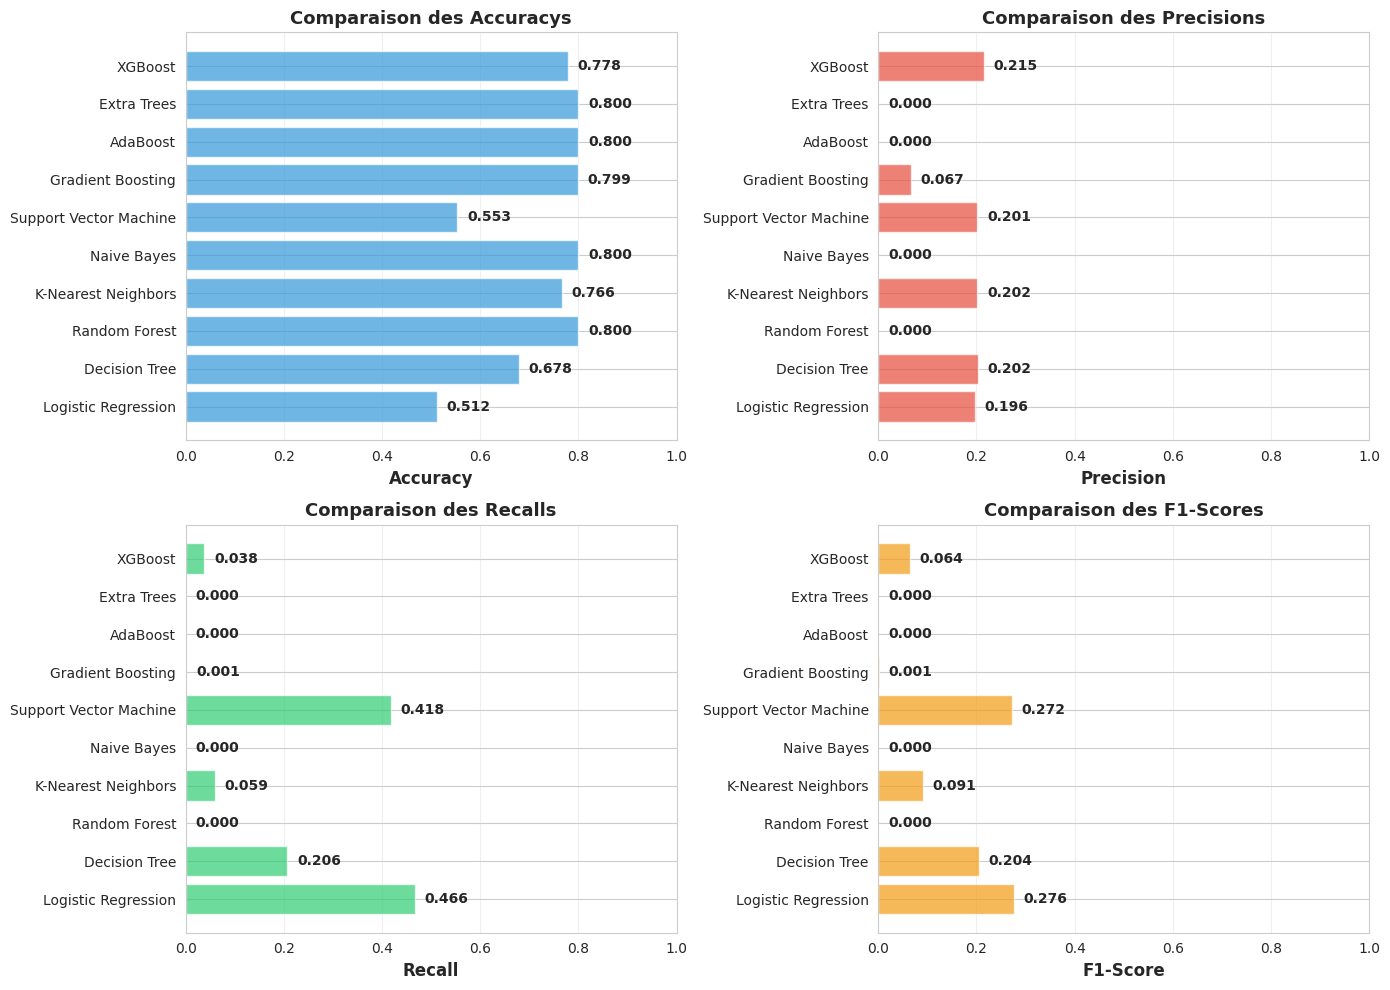

In [ ]:
print("\n" + "="*80)
print("VISUALISATION DES PERFORMANCES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(results_df['Modèle'], results_df[metric], color=color, alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparaison des {metric}s', fontsize=13, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)

    for i, (bar, value) in enumerate(zip(bars, results_df[metric])):
        ax.text(value + 0.02, i, f'{value:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# **11. Entraînement Final et Évaluation sur le Test Set**

## **Pourquoi réentraîner sur tout le train ?**

La validation croisée sert uniquement à **estimer** les performances.
Pour obtenir le modèle final, on doit :
1. ✅ Réentraîner sur **100% du train**
2. ✅ Évaluer sur le **test set** (données jamais vues)

## **Matrices de confusion**

La matrice de confusion montre :
- **Vrais Négatifs (TN)** : "No" correctement prédit
- **Faux Positifs (FP)** : Prédit "Yes" mais réel "No"
- **Faux Négatifs (FN)** : Prédit "No" mais réel "Yes" ⚠️ GRAVE en médecine !
- **Vrais Positifs (TP)** : "Yes" correctement prédit

Une bonne matrice doit avoir des valeurs élevées sur la **diagonale** (TN et TP).

In [ ]:
print("\n" + "="*80)
print("ENTRAÎNEMENT FINAL ET ÉVALUATION SUR LE TEST")
print("="*80)

final_results = []

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"🎯 Évaluation finale: {name}")
    print(f"{'='*60}")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train_encoded, y_train)
    y_pred = pipeline.predict(X_test_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📊 Performances sur le TEST:")
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")


ENTRAÎNEMENT FINAL ET ÉVALUATION SUR LE TEST

🎯 Évaluation finale: Logistic Regression

📊 Performances sur le TEST:
  Accuracy:  0.498
  Precision: 0.194
  Recall:    0.480
  F1-Score:  0.277

🎯 Évaluation finale: Decision Tree

📊 Performances sur le TEST:
  Accuracy:  0.694
  Precision: 0.213
  Recall:    0.197
  F1-Score:  0.205

🎯 Évaluation finale: Random Forest


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Performances sur le TEST:
  Accuracy:  0.800
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000

🎯 Évaluation finale: K-Nearest Neighbors

📊 Performances sur le TEST:
  Accuracy:  0.760
  Precision: 0.166
  Recall:    0.050
  F1-Score:  0.077

🎯 Évaluation finale: Naive Bayes


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Performances sur le TEST:
  Accuracy:  0.800
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000

🎯 Évaluation finale: Support Vector Machine

📊 Performances sur le TEST:
  Accuracy:  0.549
  Precision: 0.200
  Recall:    0.417
  F1-Score:  0.270

🎯 Évaluation finale: Gradient Boosting

📊 Performances sur le TEST:
  Accuracy:  0.799
  Precision: 0.200
  Recall:    0.002
  F1-Score:  0.003

🎯 Évaluation finale: AdaBoost


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Performances sur le TEST:
  Accuracy:  0.800
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000

🎯 Évaluation finale: Extra Trees


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:51:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Performances sur le TEST:
  Accuracy:  0.800
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000

🎯 Évaluation finale: XGBoost

📊 Performances sur le TEST:
  Accuracy:  0.780
  Precision: 0.188
  Recall:    0.030
  F1-Score:  0.052


## 🩺 Analyse des résultats de classification — Prédiction d’une maladie cardiaque

Les résultats obtenus montrent un fort déséquilibre dans les classes, ce qui entraîne plusieurs modèles à prédire presque uniquement la classe majoritaire, rendant leur performance médicale inutilisable. Les métriques les plus importantes dans ce contexte sont le **rappel (recall)** et le **F1-score**, car l’objectif principal est d’identifier le maximum de patients potentiellement malades, même au prix de quelques faux positifs.

Dans cette optique, seuls quelques modèles parviennent à détecter correctement des cas positifs. Parmi eux, ceux qui atteignent les meilleurs niveaux de rappel se distinguent clairement et constituent les options les plus pertinentes pour une tâche de dépistage médical. Le modèle qui obtient le meilleur compromis entre rappel et précision, et donc le plus adapté à cet usage, est celui qui maximise la détection des cas réellement malades tout en conservant une cohérence dans ses prédictions.

Pour améliorer encore les performances, il sera nécessaire d’intégrer des techniques de **rééquilibrage des classes** (telles que `class_weight='balanced'` ou l’utilisation de SMOTE) et d’ajuster le **seuil de décision** afin d’augmenter le rappel. Ces étapes sont essentielles pour construire un modèle fiable dans un contexte où manquer un patient malade constitue le risque le plus critique.
